In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import pybedtools
import os

# REgulamentary distribution

In [3]:
# Loading REgulamentary huvec results
re = pd.read_csv("endothelial-cell-of-umbilical-vein/ATAC/08_REgulamentary/mlv_REgulamentary.csv", sep='\t')
re = re[re['RE']!='Not assigned']

df1 = pd.DataFrame(re['RE'].value_counts())
df1['RE'] = df1.index
df1.index.name = None

dict_colors = {}
dict_colors['Enhancer'] = sns.color_palette('colorblind')[0]
dict_colors['Promoter'] = sns.color_palette('colorblind')[1]
dict_colors['CTCF'] = sns.color_palette('colorblind')[2]
dict_colors['Enhancer/CTCF'] = sns.color_palette('colorblind')[3]
dict_colors['Promoter/CTCF'] = sns.color_palette('colorblind')[4]

color_lits = []
for i in df1['RE']:
    color_lits.append(dict_colors[i])
df1['color'] = color_lits

df1 = df1.T[['Enhancer', 'Promoter', 'CTCF', 'Enhancer/CTCF', 'Promoter/CTCF']].T

In [4]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}% - ({:d})".format(pct, absolute)

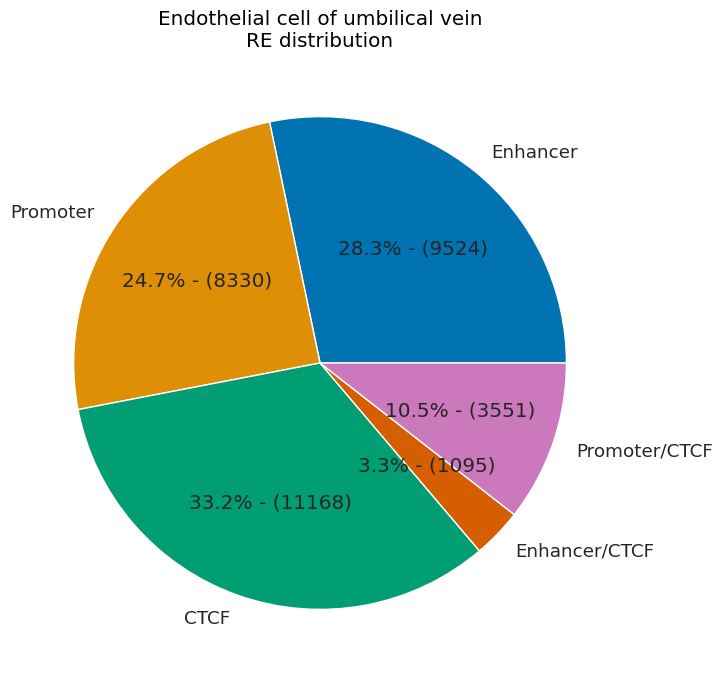

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.set(font_scale=1.2)

ax.pie(df1['count'], labels = df1['RE'], colors = df1['color'], autopct=lambda pct: func(pct, df1['count']))
ax.set_title("Endothelial cell of umbilical vein\nRE distribution")


plt.show()
# fig.savefig("piechart_distr_RE.pdf", format='pdf', bbox_inches='tight')